<a href="https://colab.research.google.com/github/krissaint/CMPE148/blob/main/SoDA_Social_Distance_Alert_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'soda-social-distancing-alert-with-smartwatches:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4865445%2F8210252%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240716%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240716T222735Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9a5c888b8e7b03f4d18b2ff7f21d3d9567d87992a1e1c1a4e37022565c72f37f1b661f499c969a192a429da15cc446549fc1ab724256b74bb9deef5e9d6e4173cf803d0280ec10bd90b7c8ecbd8727932c75b666daa76c8021e6df6e05bb42705e553cb559dcc977500200d6d4216eff534bd13f242550d1b3021121ed955f9d0887e49e81cc5b961ba8d5bf339b0fc14c5b8ef03c26082c9d84e011a98d04668c1dfcc939825fe967adf0072b51236e0aa4dd88b9a985607c04bc7efe80d2f49512425a6c5baba77766313a4738b9e3c047ac5e833b5d5da57654750b11dd38973177755db30c3aa8c5145c571c0537d0a2858d62ac01c80c44a7945ed5ddbb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7231906 bytes downloaded
Downloaded and uncompressed: soda-social-distancing-alert-with-smartwatches
Data source import complete.


Pubished on May 08, 2024. By Marília Prata, mpwolke

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # new
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soda-social-distancing-alert-with-smartwatches/18actions.png
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/01_10_1.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/05_5_6.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/09_2_1.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/06_11_3.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/05_7_8.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/04_3_3.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/04_13_1.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/09_8_0.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/07_15_7.mat
/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/02_14_9.mat
/kaggle/input/soda-social-distancing-ale

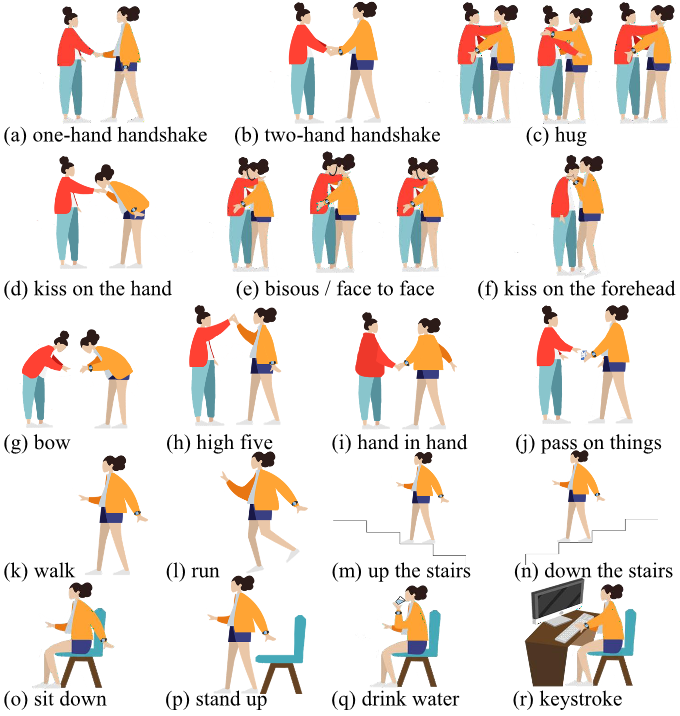

In [22]:
from PIL import Image
imgs_dir = '../input/soda-social-distancing-alert-with-smartwatches/'
Image.open(imgs_dir + '18actions.png')

#SoDA (Social Distancing Alert)

Social Distancing Alert with Smartwatches

Authors: Xin Wang, Xilei Wu, Huina Meng, Yuhan Fan, Jingang Shi, Han Ding, Fei Wang

"Social distancing is an efficient public health practice during the COVID-19 pandemic. However, people would violate the social distancing practice unconsciously when they conduct some social activities such as handshaking, hugging, kissing on the face or forehead, etc."

"In this paper, the authors presented SoDA, a social distancing practice violation alert system based on smartwatches, for preventing COVID-19 virus transmission. SoDA utilizes recordings of accelerometers and gyroscopes to recognize activities that may violate social distancing practice with simple yet effective Vision Transformer models."

"Extensive experiments over 10 volunteers and 1800+ samples demonstrate that SoDA achieves social activity recognition with the accuracy of 94.7%, 1.8% negative alert, and 2.2% missing alert."

https://arxiv.org/abs/2205.06110#:~:text=SoDA%20utilizes%20recordings%20of%20accelerometers,yet%20effective%20Vision%20Transformer%20models.

In [23]:
import scipy.io as sio # for reading matlab files
import pathlib
from pathlib import Path
import zipfile
print("setup complete")

setup complete


In [24]:
m = sio.loadmat('/kaggle/input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/07_7_6.mat',struct_as_record=True)
print('Keys in the matlab dict file: \n', m.keys(), '\n')

Keys in the matlab dict file: 
 dict_keys(['__header__', '__version__', '__globals__', 'accData', 'gyrData', 'label']) 



In [25]:
print(type(m['accData'])) #the mill parts has one the work here
data = m['accData']
# data = data.reshape(-1, 1)
# data1=pd.DataFrame(data,columns="data",index=1)

<class 'numpy.ndarray'>


In [26]:
l = data.dtype.names
print('List of the field names:\n',l)

List of the field names:
 None


#Not expected to have None

That happened also on gyrData and label.

#Trying another way

In [27]:
import scipy.io

In [28]:
# Import to a python dictionary
mat = scipy.io.loadmat('../input/soda-social-distancing-alert-with-smartwatches/SoDA/datasource/05_5_4.mat')

#Pick what name is near array

In [29]:
# Look at the dictionary items
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Dec  7 17:24:35 2021'), ('__version__', '1.0'), ('__globals__', []), ('accData', array([[[  0.155533,   0.253639,   0.320638,   0.409173,   0.40678 ,
           0.334995,   0.464208,   0.547956,   0.366102,   0.224925,
           0.370888,   0.55992 ,   0.380459,   0.440279,   0.648455,
           0.643669,   0.756132,   0.751346,   0.655633,   0.76331 ,
           0.945165,   1.021735,   1.007378,   0.89013 ,   0.978664,
           1.241875,   1.476372,   1.337588,   1.447658,   1.840081,
           1.811367,   1.65344 ,   1.806581,   1.947758,   1.605584,
           1.548156,   1.184447,   0.619741,  -0.141177,  -1.095913,
          -2.127219,  -2.900101,  -3.261417,  -3.622734,  -3.778267,
          -5.168497,  -5.513064,  -5.010571,  -5.156533,  -6.38405 ,
          -7.118648,  -7.345965,  -7.977671,  -8.812766,  -9.24108 ,
          -9.506684, -10.305886, -11.294124, -12.124433, -12.758532,
         -13

In [40]:
# Extract the data
acc_data = mat['accData']
gyr_data = mat['gyrData']
labels = mat['label']

In [41]:
# Reshape the data for CSV export
# Assuming acc_data and gyr_data have the shape (1, 3, sequence_length)
acc_data_reshaped = acc_data.reshape(-1, acc_data.shape[-1])
gyr_data_reshaped = gyr_data.reshape(-1, gyr_data.shape[-1])

In [42]:
# Convert to DataFrames
df_acc = pd.DataFrame(acc_data_reshaped.T, columns=['Acc_X', 'Acc_Y', 'Acc_Z'])
df_gyr = pd.DataFrame(gyr_data_reshaped.T, columns=['Gyr_X', 'Gyr_Y', 'Gyr_Z'])
df_labels = pd.DataFrame(labels.T, columns=['Label'])

In [47]:
#Save DataFrames to CSV
df_acc.to_csv('acc_data.csv', index=False)
df_gyr.to_csv('gyr_data.csv', index=False)
df_labels.to_csv('labels.csv', index=False)

#Every mat file contains three keys:

accData(1, 3, sequence length): A sequence of the accelerometer readings.

gyrData (1, 3, sequence length): A sequence of the gyroscope readings.

label(1, sequence length): Action labels for each sample point.

https://www.kaggle.com/datasets/rabieelkharoua/soda-social-distancing-alert-with-smartwatches

Since label is the only one with(1, sequence length) I could apply to_csv

In [48]:
#Code by StackOverflow https://stackoverflow.com/questions/68470067/how-to-convert-mat-matlab-file-to-csv-in-python
#Answered by Arilwan Nov 1, 2021 at 11:13 Edited by Dharman


#your_data = mat['label']

#df = pd.DataFrame(your_data)
#df.to_csv('your_data.csv') #your_data.csv final data in csv file


In [49]:
ls

acc_data.csv  gyr_data.csv  labels.csv  sample_data/  your_data.csv


In [50]:
# Load the CSV files
df_acc = pd.read_csv('acc_data.csv')
df_gyr = pd.read_csv('gyr_data.csv')
df_labels = pd.read_csv('labels.csv')

# Display the first few rows of each DataFrame
print(df_acc.head())
print(df_gyr.head())
print(df_labels.head())

      Acc_X     Acc_Y     Acc_Z
0  0.155533 -8.798409 -5.209175
1  0.253639 -8.925228 -5.259424
2  0.320638 -8.664411 -4.898108
3  0.409173 -8.518449 -4.701896
4  0.406780 -8.855836 -4.838287
   Gyr_X  Gyr_Y  Gyr_Z
0  15.12   7.91 -13.02
1  19.95   8.05 -13.16
2  23.59  10.22 -14.77
3  20.72  13.37 -14.91
4  16.94  14.63 -13.16
   Label
0      5
1      5
2      5
3      5
4      5


Basic Statistics


In [52]:
# Display basic statistics
print(df_acc.describe())
print(df_gyr.describe())
print(df_labels.describe())

            Acc_X       Acc_Y       Acc_Z
count  249.000000  249.000000  249.000000
mean    -5.589259   -5.501263   -3.613354
std      4.902385    3.152558    1.526967
min    -13.241880  -10.932807   -6.599405
25%     -9.702895   -8.819944   -4.685147
50%     -7.367501   -5.228317   -3.924229
75%      0.229711   -2.593820   -2.337788
max      1.947758    0.624527    0.416351
            Gyr_X       Gyr_Y       Gyr_Z
count  249.000000  249.000000  249.000000
mean    -0.386827    3.814297    3.377711
std     71.882890   76.890222   50.134375
min   -200.480000 -208.600000 -133.140000
25%    -27.650000  -18.480000  -17.080000
50%      0.910000    3.500000   -6.300000
75%     27.580000   43.540000   21.770000
max    246.680010  152.390000  145.320000
       Label
count  249.0
mean     5.0
std      0.0
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0


Histograms

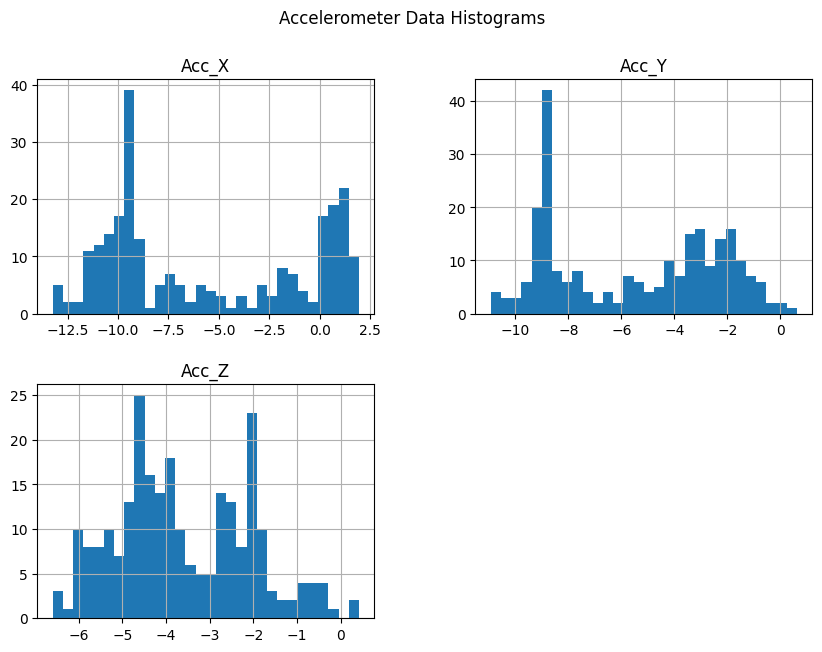

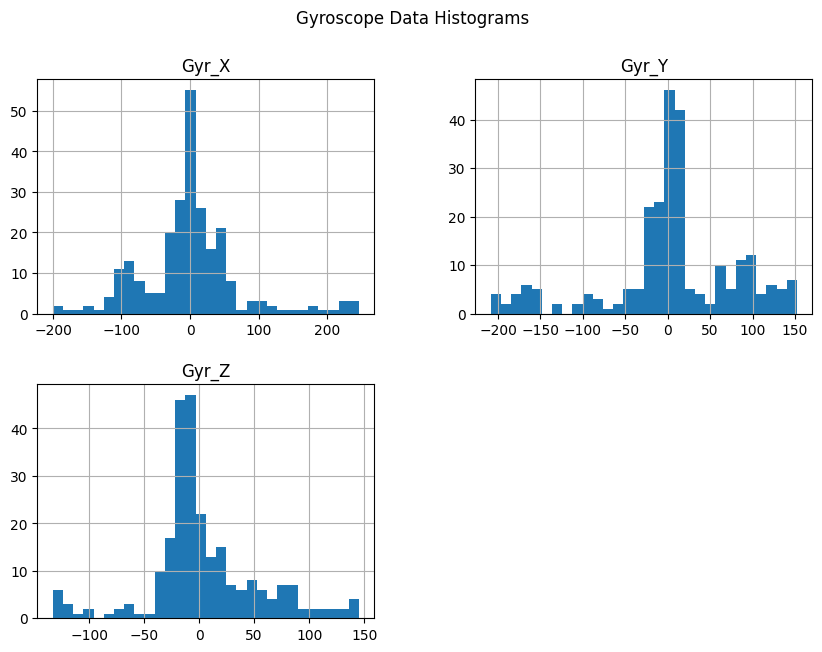

In [55]:
import matplotlib.pyplot as plt

# Plot histograms for accelerometer data
df_acc.hist(bins=30, figsize=(10, 7))
plt.suptitle('Accelerometer Data Histograms')
plt.show()

# Plot histograms for gyroscope data
df_gyr.hist(bins=30, figsize=(10, 7))
plt.suptitle('Gyroscope Data Histograms')
plt.show()

Time Series Plots


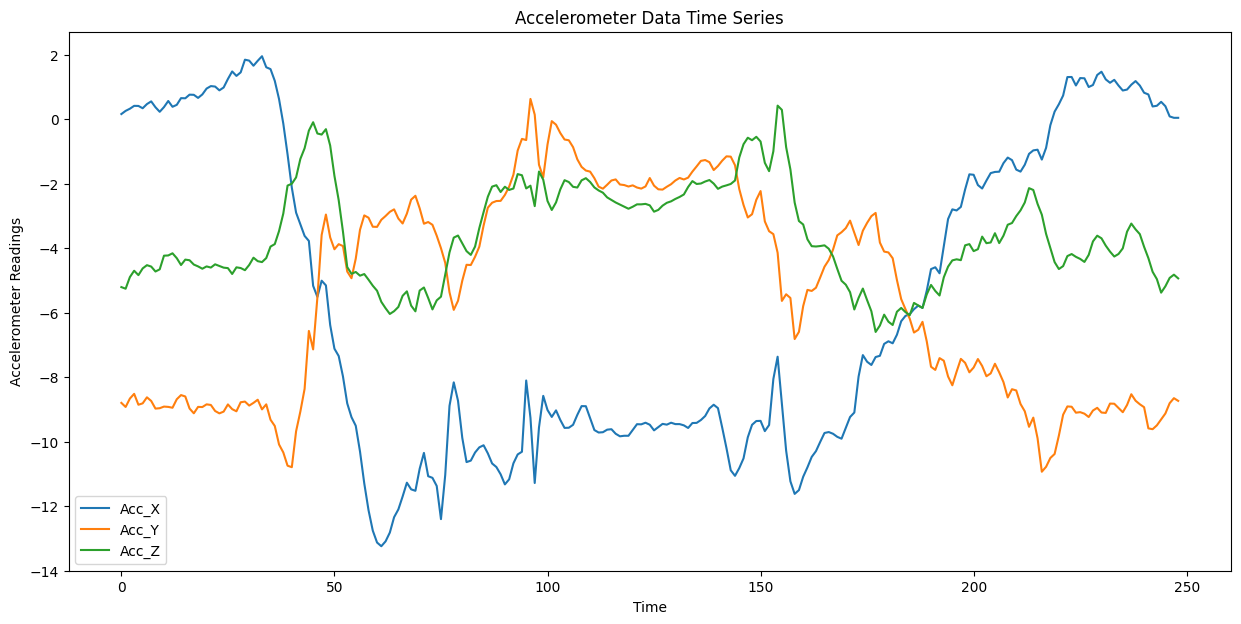

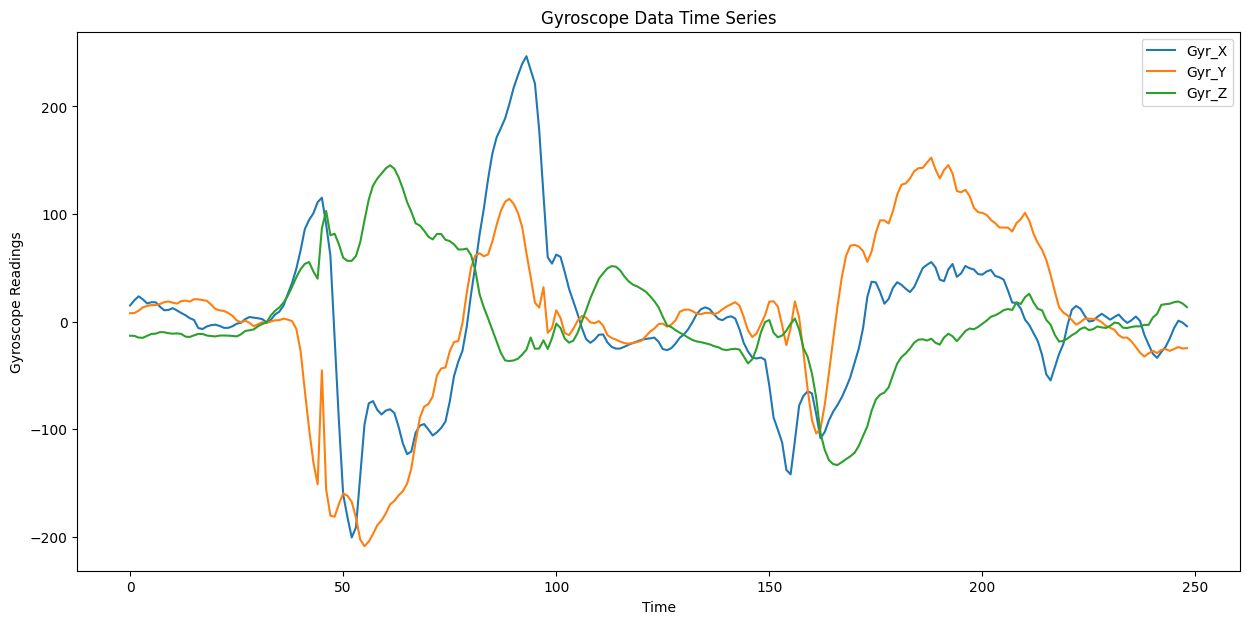

In [56]:
# Plot time series for accelerometer data
df_acc.plot(figsize=(15, 7))
plt.title('Accelerometer Data Time Series')
plt.xlabel('Time')
plt.ylabel('Accelerometer Readings')
plt.show()

# Plot time series for gyroscope data
df_gyr.plot(figsize=(15, 7))
plt.title('Gyroscope Data Time Series')
plt.xlabel('Time')
plt.ylabel('Gyroscope Readings')
plt.show()

Scatter plots

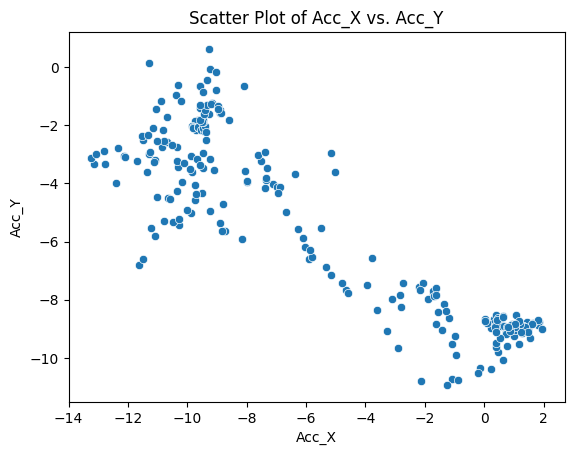

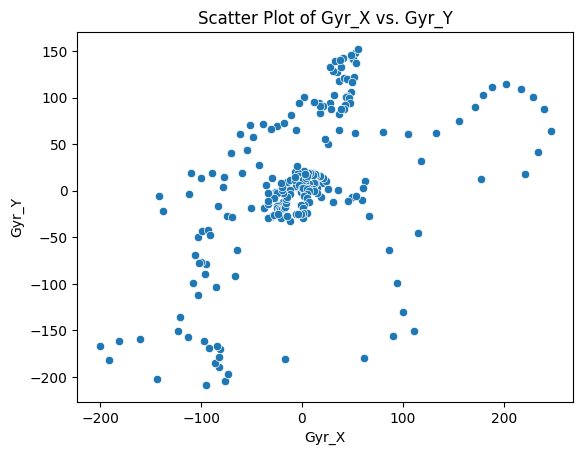

In [79]:
# Scatter plot of accelerometer data vs. labels
sns.scatterplot(x='Acc_X', y='Acc_Y', data=df_acc)
plt.title('Scatter Plot of Acc_X vs. Acc_Y')
plt.show()

# Scatter plot of gyroscope data vs. labels
sns.scatterplot(x='Gyr_X', y='Gyr_Y', data=df_gyr)
plt.title('Scatter Plot of Gyr_X vs. Gyr_Y')
plt.show()

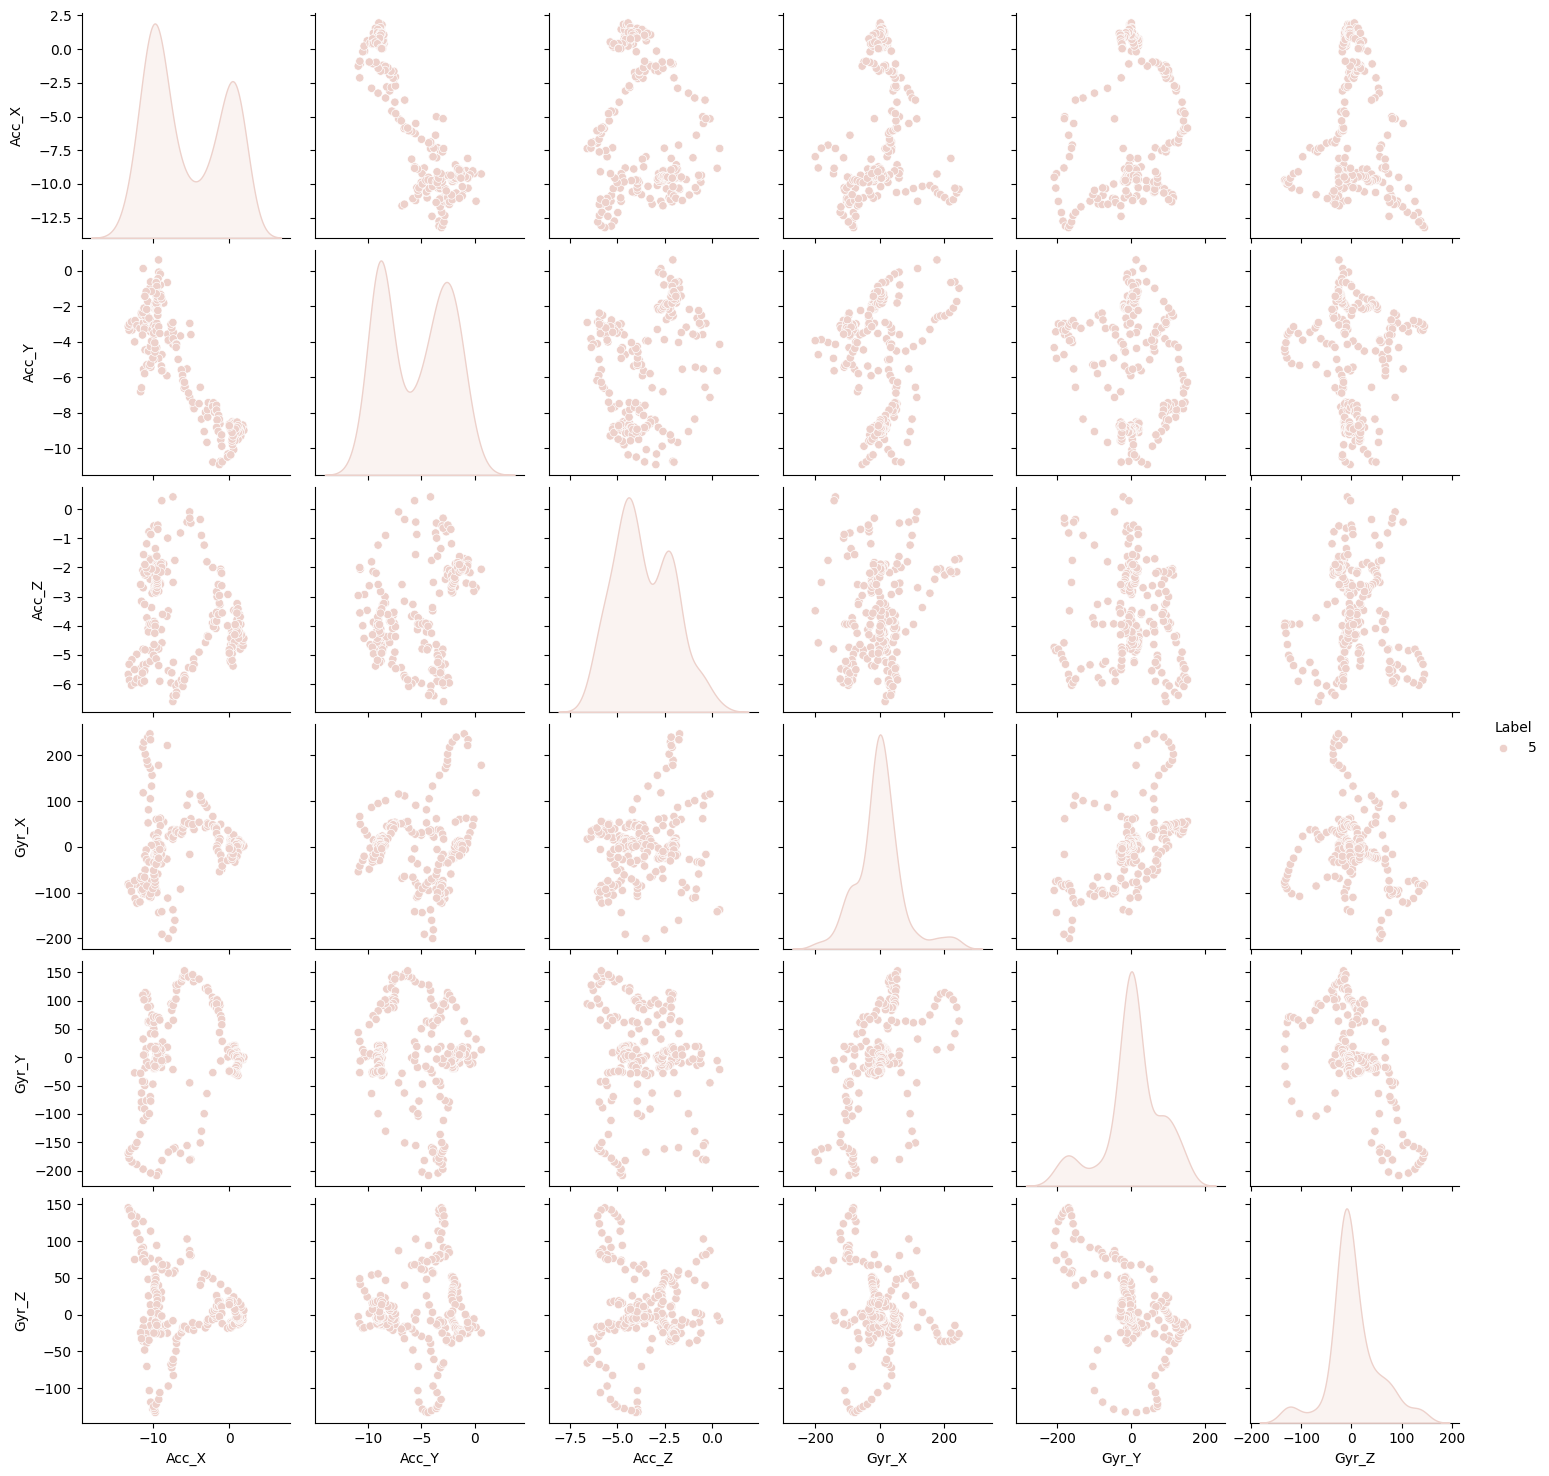

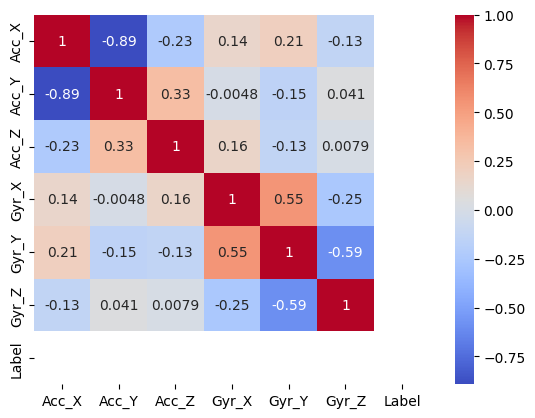

In [85]:
# Combine the accelerometer and gyroscope data into a single DataFrame
df_combined = pd.concat([df_acc[['Acc_X', 'Acc_Y', 'Acc_Z']], df_gyr[['Gyr_X', 'Gyr_Y', 'Gyr_Z']], df_labels], axis=1)

# Pair plot
sns.pairplot(df_combined, hue='Label')
plt.show()

# Correlation matrix
corr_matrix = df_combined.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



**Preprocessing**
1. Handling Missing Values


In [60]:
# Check for missing values
print(df_acc.isnull().sum())
print(df_gyr.isnull().sum())
print(df_labels.isnull().sum())

# Fill missing values with the mean of each column
df_acc.fillna(df_acc.mean(), inplace=True)
df_gyr.fillna(df_gyr.mean(), inplace=True)
df_labels.fillna(df_labels.mean(), inplace=True)

Acc_X    0
Acc_Y    0
Acc_Z    0
dtype: int64
Gyr_X    0
Gyr_Y    0
Gyr_Z    0
dtype: int64
Label    0
dtype: int64


2. Noise Reduction


      Acc_X     Acc_Y     Acc_Z
0  0.155481 -8.798075 -5.210267
1  0.234872 -8.762804 -5.080817
2  0.304845 -8.733258 -4.955567
3  0.358925 -8.718648 -4.843182
4  0.394904 -8.723380 -4.751107
       Gyr_X      Gyr_Y      Gyr_Z
0  15.099284   7.917676 -13.023119
1  17.418514   9.427936 -13.400421
2  19.029011  10.982862 -13.566385
3  19.579159  12.522982 -13.369640
4  19.161545  13.921945 -12.801227


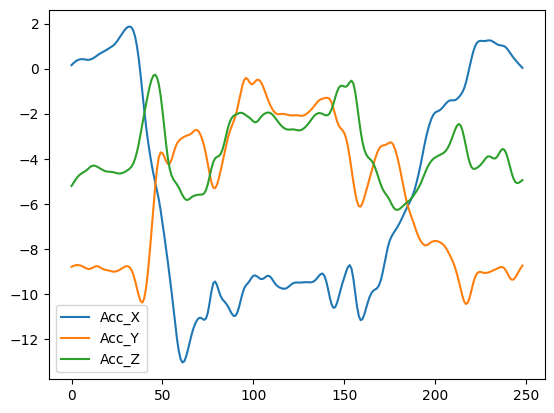

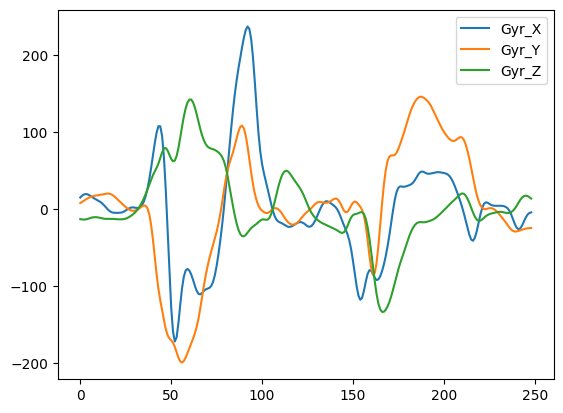

In [68]:
from scipy.signal import butter, filtfilt

# Define a low-pass filter function
def low_pass_filter(data, cutoff=0.1, fs=1.0, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply the filter to accelerometer and gyroscope data
df_acc_filtered = df_acc.apply(lambda x: low_pass_filter(x))
df_gyr_filtered = df_gyr.apply(lambda x: low_pass_filter(x))
print(df_acc_filtered.head())
print(df_gyr_filtered.head())

# Plot the filtered data
df_acc_filtered.plot()
df_gyr_filtered.plot()
plt.show()


3. Normalization

      Acc_X     Acc_Y     Acc_Z
0  1.174196 -1.047970 -1.047197
1  1.194249 -1.088279 -1.080171
2  1.207943 -1.005380 -0.843071
3  1.226039 -0.958987 -0.714314
4  1.225550 -1.066223 -0.803816
      Gyr_X     Gyr_Y     Gyr_Z
0  0.216158  0.053374 -0.327734
1  0.283486  0.055199 -0.330532
2  0.334226  0.083478 -0.362710
3  0.294219  0.124528 -0.365509
4  0.241528  0.140948 -0.330532


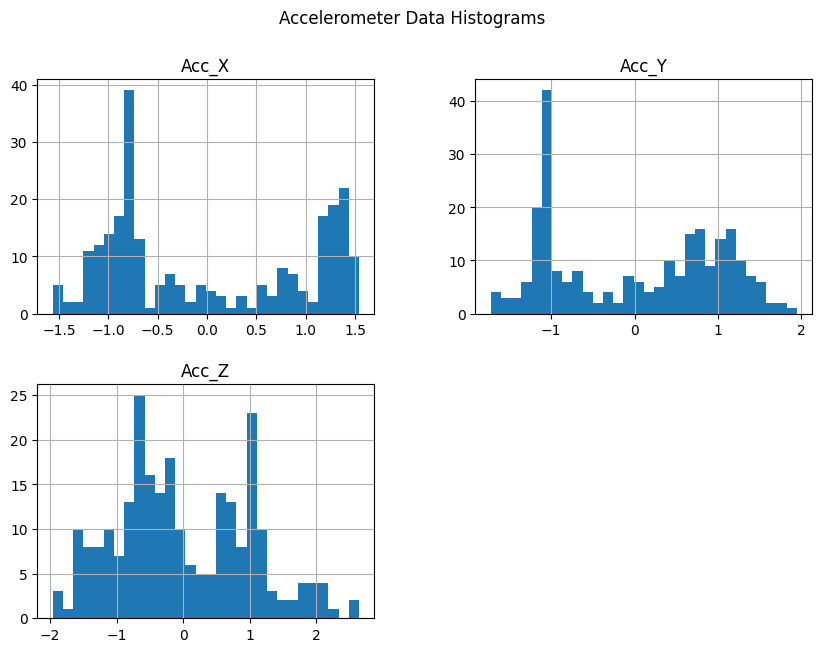

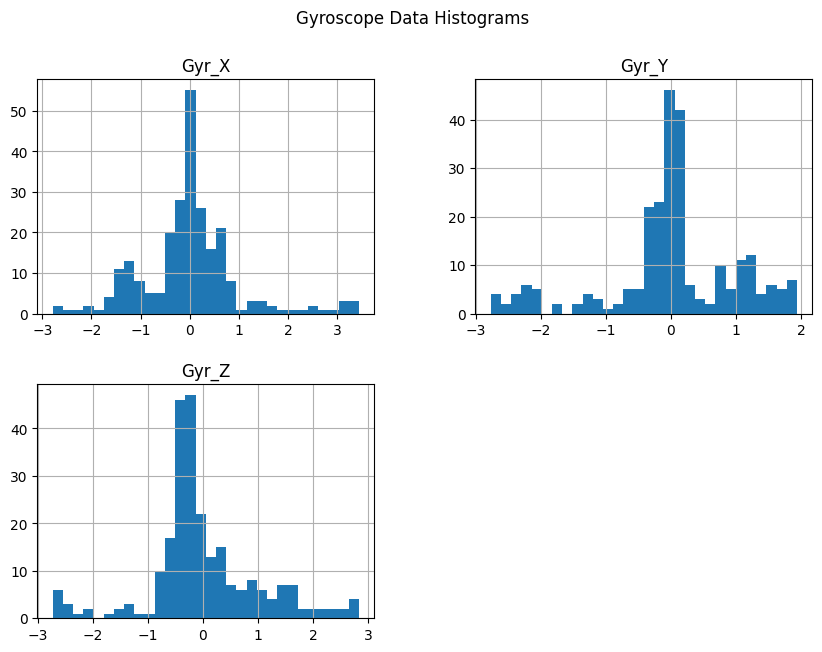

In [96]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_acc_scaled = pd.DataFrame(scaler.fit_transform(df_acc), columns=df_acc.columns)
df_gyr_scaled = pd.DataFrame(scaler.fit_transform(df_gyr), columns=df_gyr.columns)
print(df_acc_scaled.head())
print(df_gyr_scaled.head())

# Plot the scaled data with histogram
df_acc_scaled.hist(bins=30, figsize=(10, 7))
plt.suptitle('Accelerometer Data Histograms')
plt.show()

df_gyr_scaled.hist(bins=30, figsize=(10, 7))
plt.suptitle('Gyroscope Data Histograms')
plt.show()


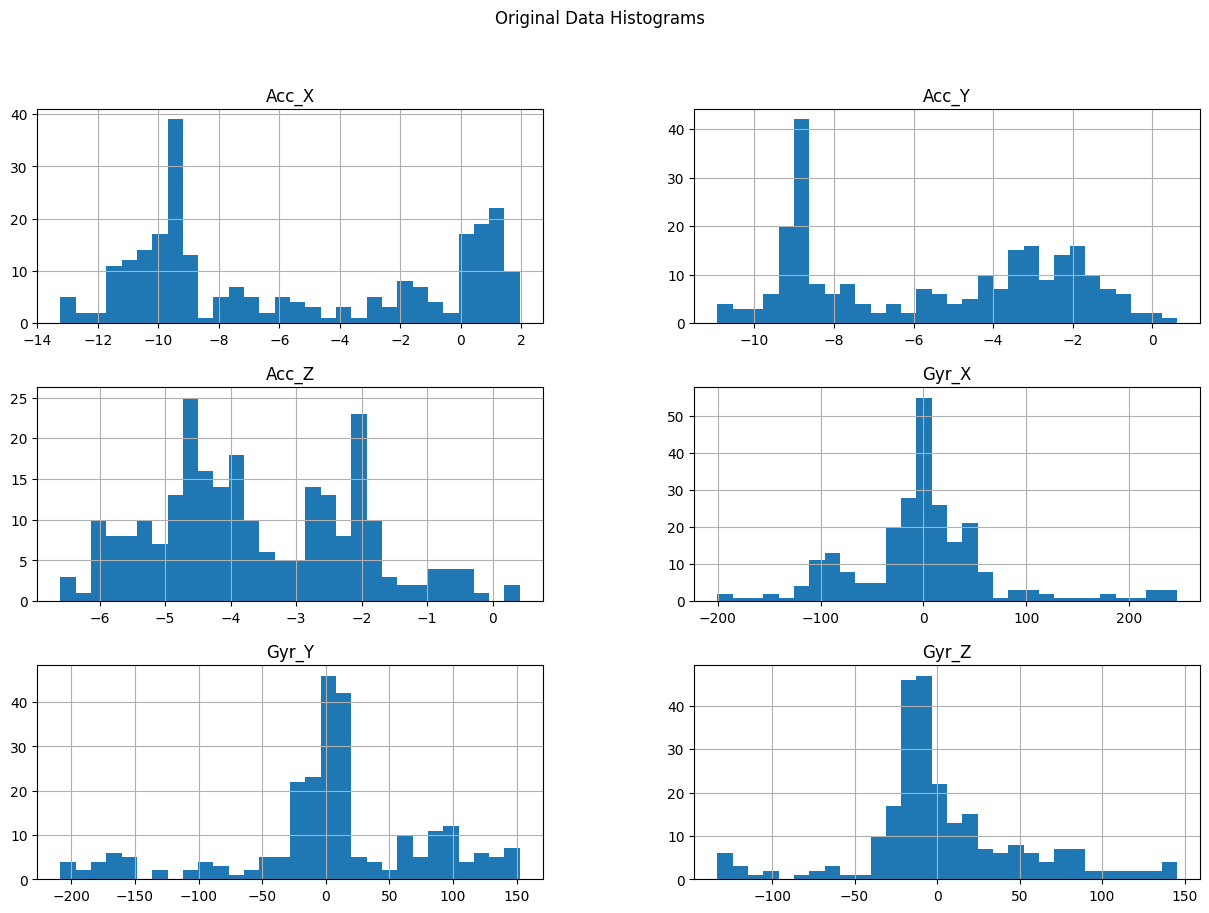

In [93]:
import matplotlib.pyplot as plt

# Plot original data histograms
df_combined[['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Original Data Histograms')
plt.show()



Data segmentation

In [97]:
import numpy as np
import pandas as pd

def segment_data(data, window_size, overlap):
    """
    Segments data into fixed-size windows with or without overlap.

    Parameters:
    - data: The time-series data to segment.
    - window_size: The size of each segment (number of samples).
    - overlap: The proportion of overlap between consecutive segments.

    Returns:
    - segments: A list of segmented data.
    """
    step = int(window_size * (1 - overlap))
    segments = []

    for start in range(0, len(data) - window_size + 1, step):
        segment = data[start:start + window_size]
        segments.append(segment)

    return np.array(segments)

# Example parameters
window_size = 50  # e.g., 50 samples per segment
overlap = 0.5  # 50% overlap

# Segment each axis separately
acc_x_segments = segment_data(df_acc['Acc_X'].values, window_size, overlap)
acc_y_segments = segment_data(df_acc['Acc_Y'].values, window_size, overlap)
acc_z_segments = segment_data(df_acc['Acc_Z'].values, window_size, overlap)

# Combine segments into a single array
segments = np.stack([acc_x_segments, acc_y_segments, acc_z_segments], axis=-1)


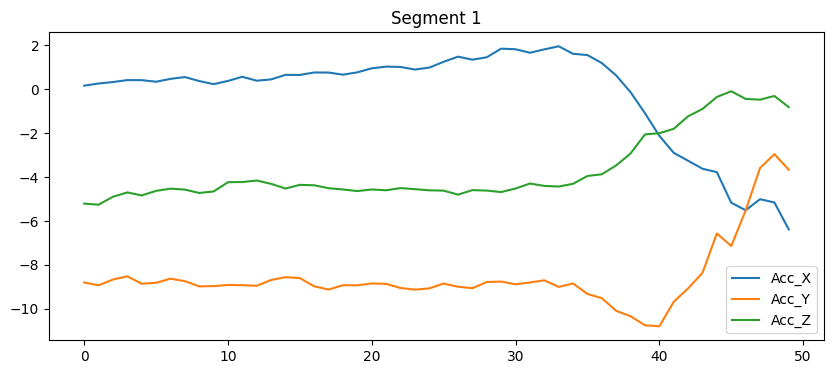

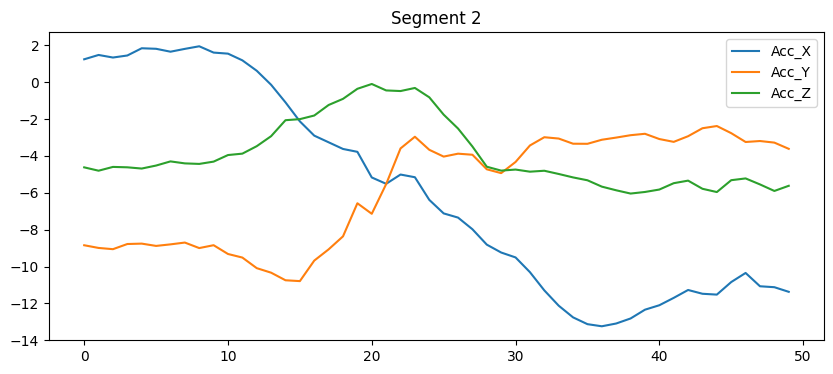

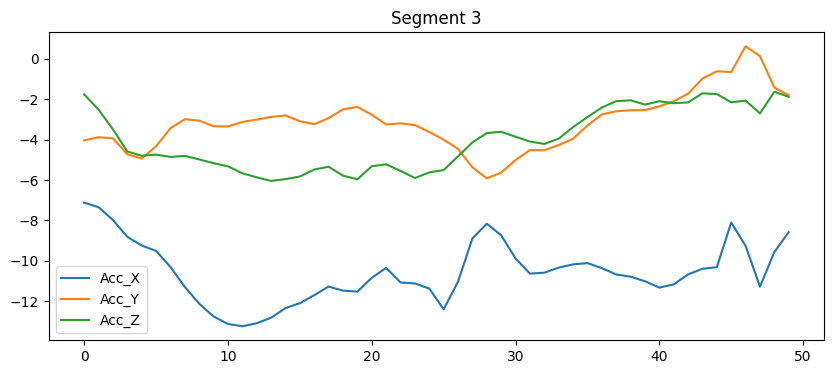

In [98]:
import matplotlib.pyplot as plt

# Plot the first few segments to visualize
for i in range(3):  # Plot the first 3 segments
    plt.figure(figsize=(10, 4))
    plt.plot(segments[i, :, 0], label='Acc_X')
    plt.plot(segments[i, :, 1], label='Acc_Y')
    plt.plot(segments[i, :, 2], label='Acc_Z')
    plt.title(f'Segment {i+1}')
    plt.legend()
    plt.show()


#Acknowledgements:

Chris Crawford https://www.kaggle.com/code/crawford/reading-mat-files-into-python

Vinayak Tyagi https://www.kaggle.com/code/vinayak123tyagi/mat-to-csv-code

Sandeep Patel https://www.kaggle.com/code/sandeep1507/milling3